In [1]:
from sympy.abc import x,y,z,t
from sympy import solve, exp, log, Matrix, simplify, factor, expand, limit, oo, re, im
from sympy.tensor.array import derive_by_array

In [2]:
f = x**4 -4*x*y +y**4
gradient = derive_by_array(f, [x,y])

In [3]:
g0 = gradient.subs({x:1., y:-1.})
g0

[8.00000000000000, -8.00000000000000]

In [4]:
phi_0 = f.subs({x:1-t*g0[0], y:-1-t*g0[1]})
expand(phi_0)

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6

In [5]:
def mint(f):
    df = derive_by_array(f,t)
    end = limit(f, t, oo)
    start = f.subs({t:0.})
#     print("Start and End")
#     print(start)
#     print(end)
    if end==oo:
        output=0
        target=start
    else:
        end = end.evalf()
        if end > start:
            output=0
            target=start
        else:
            output=oo
            target=end
        
    crits = [a for a in solve(df) if (im(a)==0 and re(a)>=0)]
    for a in crits:
        target_v = f.subs({t:a})
        if target_v < target:
            output = a
            target = target_v
    return output

In [6]:
mint(t-log(t))

1

In [7]:
mint(phi_0)

0.125000000000000

In [8]:
def steepest2(f, x0, y0, steps, verbatim=False):
    output_str  = "\\begin{tabular}{|r|r|r|r|} \\hline \n"
    output_str += " $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\\\ \\hline \\hline \n"
    output_str += "$0$ & $%1.8f$ & $%1.8f$ & $%1.3E$ \\\\ \\hline \n" % (x0, y0, f.subs({x:x0, y:y0}))
    gradient = derive_by_array(f, [x,y])
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        g0 = gradient.subs({x:x0, y:y0})
        phi = f.subs({x: x0-t*g0[0], y: y0-t*g0[1]})
        if verbatim: 
            print(expand(phi))
            print(solve(phi))
        t0 = mint(phi)
        xn = x0 - t0*g0[0]
        yn = y0 - t0*g0[1]
        outputx.append(xn)
        outputy.append(yn)
        output_str += "$%d$ & $%1.8f$ & $%1.8f$ & $%1.3E$ \\\\ \\hline \n" % (step+1,xn,yn,f.subs({x:xn, y:yn}))
        x0,y0 = xn,yn
    output_str += "\\end{tabular}"
    return outputx, outputy, output_str

In [9]:
# ox1,oy1,os = steepest2(f, -1.,1.,3,verbatim=True)
# print(os)
# ox1=ox1[:2]
# oy1=oy1[:2]

In [10]:
ox2,oy2,os = steepest2(f, 3.5,2.1,16)
print(os)
ox2=ox2[:16]
oy2=oy2[:16]

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $3.50000000$ & $2.10000000$ & $1.401E+02$ \\ \hline 
$1$ & $1.04447208$ & $1.75306447$ & $3.311E+00$ \\ \hline 
$2$ & $1.14193064$ & $1.06327575$ & $-1.878E+00$ \\ \hline 
$3$ & $1.00858074$ & $1.04443506$ & $-1.989E+00$ \\ \hline 
$4$ & $1.01396611$ & $1.00631870$ & $-1.999E+00$ \\ \hline 
$5$ & $1.00089751$ & $1.00447227$ & $-2.000E+00$ \\ \hline 
$6$ & $1.00143736$ & $1.00065139$ & $-2.000E+00$ \\ \hline 
$7$ & $1.00009296$ & $1.00046144$ & $-2.000E+00$ \\ \hline 
$8$ & $1.00014863$ & $1.00006737$ & $-2.000E+00$ \\ \hline 
$9$ & $1.00000962$ & $1.00004773$ & $-2.000E+00$ \\ \hline 
$10$ & $1.00001538$ & $1.00000697$ & $-2.000E+00$ \\ \hline 
$11$ & $1.00000100$ & $1.00000494$ & $-2.000E+00$ \\ \hline 
$12$ & $1.00000159$ & $1.00000072$ & $-2.000E+00$ \\ \hline 
$13$ & $1.00000010$ & $1.00000051$ & $-2.000E+00$ \\ \hline 
$14$ & $1.00000016$ & $1.00000007$ & $-2.000E+00$ \\ \hline 
$15$ & $

In [11]:
ox3,oy3,os = steepest2(f, -13.5,-7.3,20)
print(os)
ox3=ox3[:17]
oy3=oy3[:17]

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-13.50000000$ & $-7.30000000$ & $3.566E+04$ \\ \hline 
$1$ & $2.36272171$ & $-4.87173276$ & $6.405E+02$ \\ \hline 
$2$ & $1.43415388$ & $1.19416184$ & $-5.865E-01$ \\ \hline 
$3$ & $1.02150202$ & $1.13099304$ & $-1.896E+00$ \\ \hline 
$4$ & $1.03881725$ & $1.01788084$ & $-1.992E+00$ \\ \hline 
$5$ & $1.00230464$ & $1.01229149$ & $-1.999E+00$ \\ \hline 
$6$ & $1.00390940$ & $1.00180838$ & $-2.000E+00$ \\ \hline 
$7$ & $1.00023638$ & $1.00124611$ & $-2.000E+00$ \\ \hline 
$8$ & $1.00039888$ & $1.00018459$ & $-2.000E+00$ \\ \hline 
$9$ & $1.00002416$ & $1.00012723$ & $-2.000E+00$ \\ \hline 
$10$ & $1.00004075$ & $1.00001886$ & $-2.000E+00$ \\ \hline 
$11$ & $1.00000247$ & $1.00001300$ & $-2.000E+00$ \\ \hline 
$12$ & $1.00000416$ & $1.00000193$ & $-2.000E+00$ \\ \hline 
$13$ & $1.00000025$ & $1.00000133$ & $-2.000E+00$ \\ \hline 
$14$ & $1.00000043$ & $1.00000020$ & $-2.000E+00$ \\ \hline 
$15$

In [12]:
# R = (1-x)**2+(y-x**2)**2
# ox,oy,os = steepest2(R, 0., 0., 10)
# print(os)

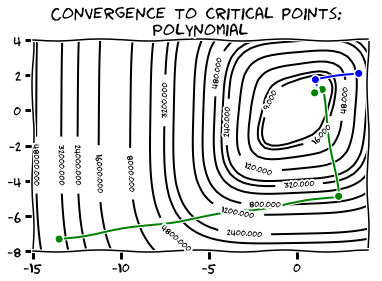

In [15]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd();

xx = np.linspace(-15,4)
yy = np.linspace(-8,4)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, X**4-4*X*Y+Y**4, levels=[9,16,48,120,240,320,480,800,1200,2400,3200,4800,8000,16000,24000,32000,48000], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
# plt.plot(ox1,oy1,'r')
# plt.plot(ox1,oy1,'or')
plt.plot(ox2,oy2,'b')
plt.plot(ox2,oy2,'ob')
plt.plot(ox3,oy3,'g')
plt.plot(ox3,oy3,'og')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.title("Convergence to critical points: \nPolynomial")
plt.show()